# Model Selection

[Video](https://www.youtube.com/watch?v=w_bLGK4Pteo&t=96s)

[Documentacion](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

En ML nunca se evalúa el rendimiento de un modelo con los datos de entrenamiento. Para ensayar el modelo tenemos que usar datos que nunca haya visto, de lo contrario se lo estaremos poniendo muy fácil a la máquina. 

Normalmente lo que hacemos es dividir los datos en dos partes: una parte para el entrenamiento y otra para el testeo. Dicho de otro modo:

    a. Train set
    b. Test set
    
Para esto aplicaremos la regla de Pareto y haremos un 80% / 20% con los datos Train/Test

Dicho de otro modo con lo que llevamos visto, tendremos:

`model.fit(X_train, y_train)`

`model.score(X_test, y_test)`

Para hacer todo esto usamos la función `model_selection.train_test_split`

In [2]:
# import necesarios
import numpy as np
import matplotlib.pyplot as plt

# importamos un data set
from sklearn.datasets import load_iris

In [14]:
# creamos el objeto iris
iris = load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

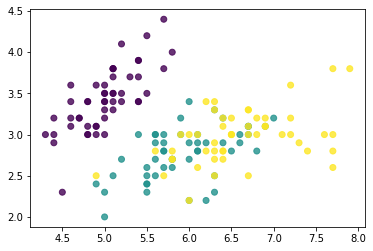

In [17]:
X = iris.data    # características
y = iris.target  # etiquetas

# representamos las características y usamos las etiquetas para el color
plt.scatter(X[:, 0], X[:,1], c=y, alpha=0.8)
plt.show()

In [11]:
X.shape

(150, 4)

Podemos ver que contamos con 150 muestras que vamos a dividir para tomar una parte de entrenamiento y otra de ensayo con la ayuda de `model_selection.train_test_split`

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# creamos las colecciones de datos y definimos el tamaño de la muestra de ensayo
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

El parámetro `test_size=n` nos ayuda a definir el tamaño de la muestra de ensayo, siendo un número comprendido entre 0-1. Si definimos el parametro a 0.5 repartirá la mitad de los datos para cada muestra.

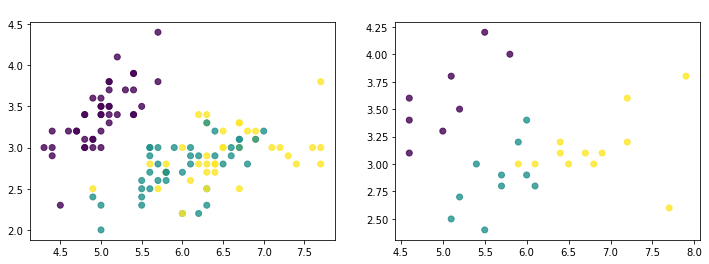

In [14]:
# si visualizamos los datos gráficamente
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
plt.title('TRAIN Set', c='w')

plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)
plt.title('TEST Set', c='w')

plt.show()

Cuando usamos la función `train_set_split` los datos se escogen de forma aleatoria, por lo que la nube de puntos será diferente cada vez que ejecutemos el trozo de código. Podemos controlar la selección estableciendo un valor para el parámetro `random_state`. De este modo el ejemplo será reproducible y obtendrás el mismo resultado siempre.

In [15]:
# establecemos un valor de 5 para el parámetro

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

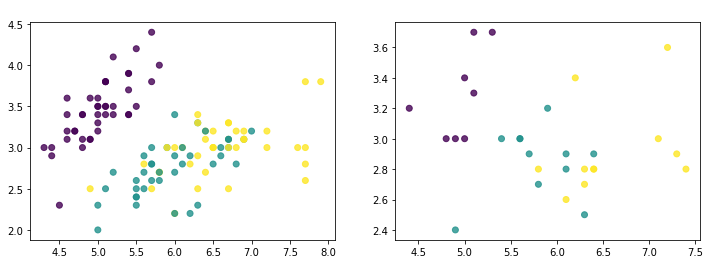

In [16]:
# si visualizamos los datos gráficamente
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
plt.title('TRAIN Set', c='w')

plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)
plt.title('TEST Set', c='w')

plt.show()

Con los datos repartidos pasamos ahora a entrenar el modelo. Elegiremos el método `KNeigbors` 

In [17]:
# importamos la clase 
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# creamos el modelo y lo fijamos en n_neighbors=1
model = KNeighborsClassifier(n_neighbors=1)

# entrenamos el modelo
model.fit(X_train, y_train)

# evaluamos el rendimiento con los datos de entrenamiento
model.score(X_train, y_train)

1.0

El resultado del rendimiento es del 100%, esto es obvio ya que la máquina ha recibido datos que ya ha visto y por lo tanto sabe lo que tiene que hacer.
Por lo tanto, vamos a pasarle al método los datos `X_test` y `y_test` para evaluar su rendimiento

In [19]:
model.score(X_test, y_test)

0.9

# Mejorar el rendimiento del modelo

Ya sabemos como entrenar y evaluar un modelo de ML. El trabajo de un científico de datos consiste en mejorar el renidmiento del modelo y conseguir mejorarlo hasta un 99% de precisión.
Esto se consigue modificando los _hiperparámetros_ del modelo.

Veamos el efecto de trabajar sobre los hiperparámetros:

In [26]:
# n_neighbors=3
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

print ('Con n_neighbors = 3')
print ('Train score: ', model.score(X_train, y_train))
print ('Test score: ', model.score(X_test, y_test))

# n_neighbors=6
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)

print ('Con n_neighbors = 6')
print ('Train score: ', model.score(X_train, y_train))
print ('Test score: ', model.score(X_test, y_test))

Con n_neighbors = 3
Train score:  0.975
Test score:  0.9333333333333333
Con n_neighbors = 6
Train score:  0.9833333333333333
Test score:  0.9666666666666667


Cuando cambiamos el hiperparámetro `n_neighbors` obtenemos un rendimiento distinto con los datos de test, pero sin embargo es un valor basante bueno, superior al 90%. Este rendimiento tan bueno se debe a que la máquina indirectamente ya había visto los datos del test set y por lo tanto no le resulta difícil conseguir un buen rendimiento.

Si queremos realmente conseguir un modelo más realista necesitamos crear una tercera sección en nuestro dataset: **El Validation Set**

Con este set de validación nosotros evaluaremos el rendimiento del modelo para buscar los hiperparámetros más adecuados. Una vez encontremos esos hiperparámetros podremos darle los datos del set de testeo para conocer el rendimiento real de nuestro modelo.

Llegados a este punto: **¿qué nos garantiza que la forma en la que cortamos los datos para crear los tres sets es la mejor?** Para tomar una buena decisión entre los dos o más modelos debemos usar el método de cross validation. 

# Cross-Validation. Validación cruzada
Este método consiste en entrenar y después validar nuestro modelo realizando antes unos cortes y probar todas las configuraciones posibles de nuestro `Train_set`. Esto lo conseguimos usando la función `cross_val_score`. 

[Leer má sobre Cross-Validation](https://scikit-learn.org/stable/modules/cross_validation.html)

In [27]:
# importamos la función necesaria para esto
from sklearn.model_selection import cross_val_score

A esta función `cross_val_score` le tenemos que pasar el modelo, los datos de train, `cv=n` representa el número de cortes que hacemos al Trainset, por último señalar el típo de métrica, que por defecto nos dará el asociado al modeo. 

In [28]:
# realizamos 5 cortes y pedimos que nos devuelva el rendimiento
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy')

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

In [23]:
# podemos hacer la media de todos los cortes
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9833333333333334

In [24]:
# controlar el número de KNN
cross_val_score(KNeighborsClassifier(2), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9666666666666668

podemos usar un bucle `for` para probar todos los valores de vecinos que queramos y buscar la mejor puntuación

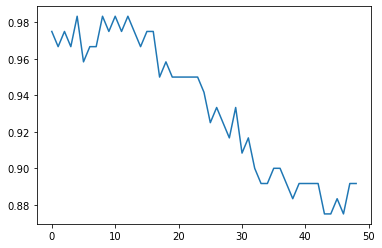

In [30]:
# iniciamos la lista que guarde los resultados
val_score = []

#creamos un bucle para cada k
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

#mostramos todos los datos de la lista val_score[]
plt.plot(val_score)
plt.show()

Por suerte está todo pensado y hay una función de sklearn que puede hacer todo esto por tí y ahorrarte el trabajo de hacer un bucle y mostrar datos. Hablamos de la función `validation_curve`

[Leer más sobre validation_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html)

In [31]:
# importamos la función

from sklearn.model_selection import validation_curve

In [32]:
model = KNeighborsClassifier()   # modelo seleccionado
k = np.arange(1, 50)             # iterador 


train_score, val_score = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)

val_score.mean(axis=1)

C:\Users\Adarax\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([0.975     , 0.96666667, 0.975     , 0.96666667, 0.98333333,
       0.95833333, 0.96666667, 0.96666667, 0.98333333, 0.975     ,
       0.98333333, 0.975     , 0.98333333, 0.975     , 0.96666667,
       0.975     , 0.975     , 0.95      , 0.95833333, 0.95      ,
       0.95      , 0.95      , 0.95      , 0.95      , 0.94166667,
       0.925     , 0.93333333, 0.925     , 0.91666667, 0.93333333,
       0.90833333, 0.91666667, 0.9       , 0.89166667, 0.89166667,
       0.9       , 0.9       , 0.89166667, 0.88333333, 0.89166667,
       0.89166667, 0.89166667, 0.89166667, 0.875     , 0.875     ,
       0.88333333, 0.875     , 0.89166667, 0.89166667])

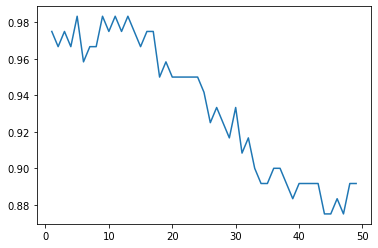

In [33]:
plt.plot(k, val_score.mean(axis=1))
plt.show()

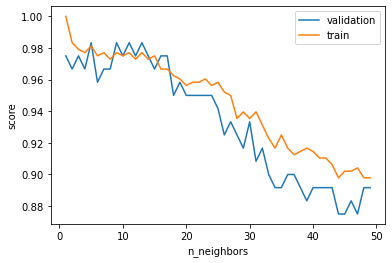

In [45]:
# podemos también comprobar todo esto sobre nuestro trains set

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

Podemos conseguir un mejor rendiemiento usando otros modelos e hiperparámetros. Hay muchos, pero para examinar todas las combinaciones posibles es mejor utilizar GridSearchCV
# GridSearchCV. Búsqueda cruzada
esta función nos permite encontrar el modelo con los mejores hiperparámetros comparando los rendimientos de cada combinación. Basicamente la función crea una tabla con los diferentes hiperparámetros que le pasamos en forma de diccionario y nos devuelve aquellos más optimos.

[Leer más sobre GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [34]:
from sklearn.model_selection import GridSearchCV

In [37]:
# creamos un diccionario con los hiperparámetros
param_grid = {'n_neighbors' : np.arange(1,20),
             'metric': ['euclidean', 'manhattan']}
 
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [38]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [39]:
grid.best_score_

0.9833333333333334

In [40]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [41]:
model = grid.best_estimator_

In [43]:
model.score(X_test, y_test)

0.9333333333333333

In [44]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(y_test, model.predict(X_test))

NameError: name 'confusion_matrix' is not defined

Ya conoces como entrenar, optimizar y evaluar un modelo de ML. Ahora cabría hacernos la pregunta de si podemos llegar a obtener mejor rendimiento si le damos más datos a nuestro modelo. Para responder a esta pregunta tenemos que dibujar la curva de aprendizaje.

# Curva de aprendizaje

La curva de aprendizaje muestra la evolución del rendimiento del modelo en función de la cantidad de datos que le damos. 
Normalmente cuantos más datos tenga el modelo para entrenar mejor será su rendimiento, pero la curva no crece de forma infinta, tiene una asintota en el 100% de rendimiento y nuestro trabajo será optimizar los datos para acercarnos lo máximo a esa asíntota lo antes posible.

Para esto usamos la funció `learning_curve`

[Leer más sobre learning_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)

In [48]:
# cargamos la función
from sklearn.model_selection import learning_curve

In [49]:
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                           train_sizes = np.linspace(0.1,1.0,10))

In [50]:
print(N)

[ 9 19 28 38 48 57 67 76 86 96]


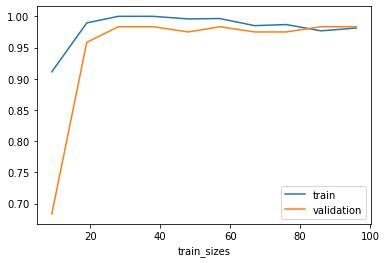

In [51]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()